<a href="https://colab.research.google.com/github/rvsvhy/Machine-Learning/blob/main/Machine_Learning_Lab_07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install catboost shap lime xgboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 4.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.4 MB/s eta 0:00:00
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=7037068ae75fea554b2e39400d5426f60669c65bffc7489de3b576970d2bb6db
  Stored in directory: /root/.cache/pip/wheels/e7/5d/0e/4b4fff9a47468fed5633211fb3b76d1db43fe806a17fb7486a
Successfully built lime


In [3]:
# =============================================================================
# 1. Imports and Setup
# =============================================================================
import json
from pathlib import Path
import numpy as np
import pandas as pd
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold, train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# =============================================================================
# 2. Function Definitions
# =============================================================================
def tuned_random_forest(X_train_full, y_train_full, X_test, y_test, out_dir):
    # Subsample for tuning
    n_sub = min(5000, len(y_train_full))
    X_tune = X_train_full[:n_sub]; y_tune = y_train_full[:n_sub]
    rf = RandomForestClassifier(random_state=42, n_jobs=-1)
    param_dist = {
        "n_estimators": [100, 200],
        "max_depth": [None, 10, 20],
        "min_samples_split": [2, 5],
        "min_samples_leaf": [1, 2]
    }
    cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
    rs = RandomizedSearchCV(rf, param_distributions=param_dist, n_iter=8, cv=cv,
                            scoring="f1_macro", random_state=42, n_jobs=-1, verbose=1)
    rs.fit(X_tune, y_tune)
    best = rs.best_estimator_
    test_acc = accuracy_score(y_test, best.predict(X_test))
    out_dir = Path(out_dir); out_dir.mkdir(parents=True, exist_ok=True)
    (out_dir/"best_rf_params.json").write_text(json.dumps(rs.best_params_, indent=2))
    (out_dir/"test_accuracy.txt").write_text(str(test_acc))
    return best, rs.best_params_, test_acc

# =============================================================================
# 3. Main Execution Block
# =============================================================================
if __name__ == "__main__":
    CSV_PATH = "/content/drive/MyDrive/Obfuscated-MalMem2022.csv"
    OUT_DIR = "lab07_a2_outputs"
    df = pd.read_csv(CSV_PATH)
    X_df = df.drop(columns=["Class", "Category"], errors="ignore")
    y_raw = df["Class"].astype(str)
    le = LabelEncoder(); y = le.fit_transform(y_raw)
    imputer = SimpleImputer(strategy="median"); X_imp = imputer.fit_transform(X_df)
    scaler = StandardScaler(); X_scaled = scaler.fit_transform(X_imp)
    X_train_full, X_test, y_train_full, y_test = train_test_split(X_scaled, y, test_size=0.20, random_state=42, stratify=y)
    best_model, best_params, test_acc = tuned_random_forest(X_train_full, y_train_full, X_test, y_test, OUT_DIR)
    print("Best RF params:", best_params); print("Test acc:", test_acc)


Fitting 3 folds for each of 8 candidates, totalling 24 fits
Best RF params: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 10}
Test acc: 0.9992320819112628



--- SVM_linear ---
Train Acc: 0.9998080040959126 Test Acc: 0.9996587030716724
Classification report:
               precision    recall  f1-score   support

      Benign       1.00      1.00      1.00      5860
     Malware       1.00      1.00      1.00      5860

    accuracy                           1.00     11720
   macro avg       1.00      1.00      1.00     11720
weighted avg       1.00      1.00      1.00     11720



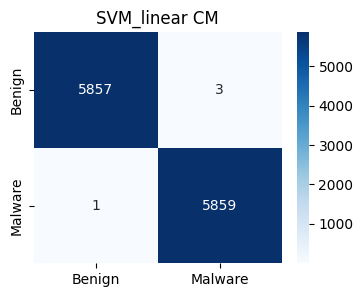


--- DecisionTree ---
Train Acc: 1.0 Test Acc: 0.9998293515358362
Classification report:
               precision    recall  f1-score   support

      Benign       1.00      1.00      1.00      5860
     Malware       1.00      1.00      1.00      5860

    accuracy                           1.00     11720
   macro avg       1.00      1.00      1.00     11720
weighted avg       1.00      1.00      1.00     11720



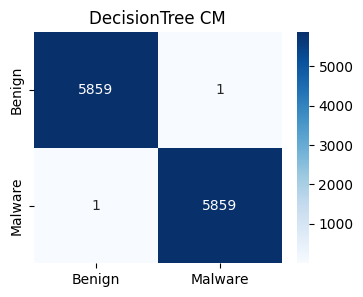


--- RandomForest ---
Train Acc: 1.0 Test Acc: 0.999914675767918
Classification report:
               precision    recall  f1-score   support

      Benign       1.00      1.00      1.00      5860
     Malware       1.00      1.00      1.00      5860

    accuracy                           1.00     11720
   macro avg       1.00      1.00      1.00     11720
weighted avg       1.00      1.00      1.00     11720



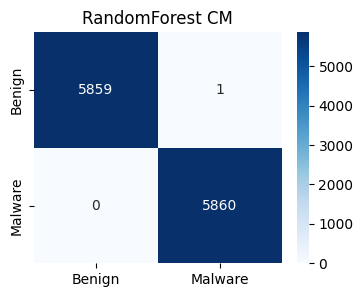


--- AdaBoost ---
Train Acc: 1.0 Test Acc: 1.0
Classification report:
               precision    recall  f1-score   support

      Benign       1.00      1.00      1.00      5860
     Malware       1.00      1.00      1.00      5860

    accuracy                           1.00     11720
   macro avg       1.00      1.00      1.00     11720
weighted avg       1.00      1.00      1.00     11720



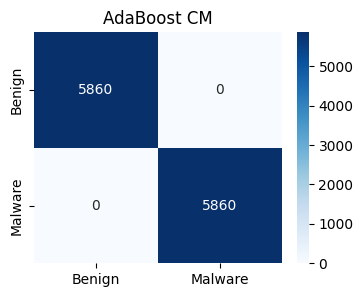


--- GaussianNB ---
Train Acc: 0.9926828227664477 Test Acc: 0.9918088737201365
Classification report:
               precision    recall  f1-score   support

      Benign       1.00      0.99      0.99      5860
     Malware       0.99      1.00      0.99      5860

    accuracy                           0.99     11720
   macro avg       0.99      0.99      0.99     11720
weighted avg       0.99      0.99      0.99     11720



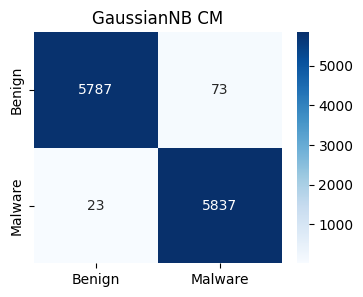


--- MLP_fast ---
Train Acc: 0.9998933356088403 Test Acc: 0.999914675767918
Classification report:
               precision    recall  f1-score   support

      Benign       1.00      1.00      1.00      5860
     Malware       1.00      1.00      1.00      5860

    accuracy                           1.00     11720
   macro avg       1.00      1.00      1.00     11720
weighted avg       1.00      1.00      1.00     11720



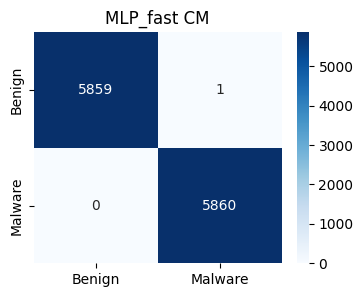


--- XGBoost ---


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [11:39:35] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Train Acc: 1.0 Test Acc: 0.9998293515358362
Classification report:
               precision    recall  f1-score   support

      Benign       1.00      1.00      1.00      5860
     Malware       1.00      1.00      1.00      5860

    accuracy                           1.00     11720
   macro avg       1.00      1.00      1.00     11720
weighted avg       1.00      1.00      1.00     11720



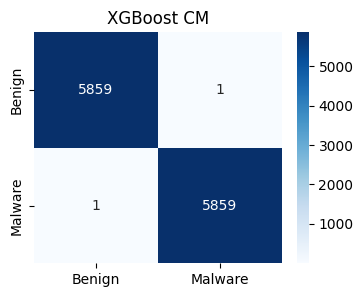


--- CatBoost ---
Train Acc: 0.9999573342435362 Test Acc: 1.0
Classification report:
               precision    recall  f1-score   support

      Benign       1.00      1.00      1.00      5860
     Malware       1.00      1.00      1.00      5860

    accuracy                           1.00     11720
   macro avg       1.00      1.00      1.00     11720
weighted avg       1.00      1.00      1.00     11720



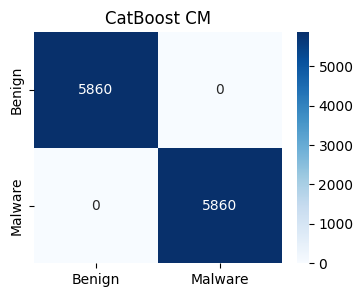

Saved results to lab07_a3_outputs
       Model  Train Acc  Test Acc Error
    AdaBoost   1.000000  1.000000  None
    CatBoost   0.999957  1.000000  None
    MLP_fast   0.999893  0.999915  None
RandomForest   1.000000  0.999915  None
     XGBoost   1.000000  0.999829  None
DecisionTree   1.000000  0.999829  None
  SVM_linear   0.999808  0.999659  None
  GaussianNB   0.992683  0.991809  None


In [4]:
# =============================================================================
# 1. Imports and Setup
# =============================================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

# optional libs guarded
try:
    import xgboost as xgb; has_xgb=True
except Exception:
    has_xgb=False; xgb=None
try:
    from catboost import CatBoostClassifier; has_cat=True
except Exception:
    has_cat=False; CatBoostClassifier=None

# =============================================================================
# 2. Function Definitions
# =============================================================================
def compare_classification_models(classifiers, X_train, y_train, X_test, y_test, target_names, out_dir):
    out_dir = Path(out_dir); out_dir.mkdir(parents=True, exist_ok=True)
    results = []
    for name, clf in classifiers.items():
        print("\n---", name, "---")
        try:
            clf.fit(X_train, y_train)
            y_pred = clf.predict(X_test)
            y_pred_tr = clf.predict(X_train)
            acc_tr = accuracy_score(y_train, y_pred_tr)
            acc_te = accuracy_score(y_test, y_pred)
            print("Train Acc:", acc_tr, "Test Acc:", acc_te)
            print("Classification report:\n", classification_report(y_test, y_pred, target_names=target_names))
            cm = confusion_matrix(y_test, y_pred)
            plt.figure(figsize=(4,3)); sns.heatmap(cm, annot=True, fmt="d", xticklabels=target_names, yticklabels=target_names, cmap="Blues")
            plt.title(name + " CM"); plt.show()
            results.append({"Model": name, "Train Acc": acc_tr, "Test Acc": acc_te, "Error": None})
        except Exception as e:
            print("Error training", name, e)
            results.append({"Model": name, "Train Acc": None, "Test Acc": None, "Error": str(e)})
    return pd.DataFrame(results)

# =============================================================================
# 3. Main Execution Block
# =============================================================================
if __name__ == "__main__":
    CSV_PATH = "/content/drive/MyDrive/Obfuscated-MalMem2022.csv"
    OUT_DIR = "lab07_a3_outputs"
    df = pd.read_csv(CSV_PATH)
    X_df = df.drop(columns=["Class", "Category"], errors="ignore")
    y_raw = df["Class"].astype(str)
    le = LabelEncoder(); y = le.fit_transform(y_raw); target_names = le.classes_
    imputer = SimpleImputer(strategy="median"); X_imp = imputer.fit_transform(X_df)
    scaler = StandardScaler(); X_scaled = scaler.fit_transform(X_imp)
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.20, random_state=42, stratify=y)
    classifiers = {
        "SVM_linear": SVC(kernel="linear", probability=True, random_state=42),
        "DecisionTree": DecisionTreeClassifier(random_state=42),
        "RandomForest": RandomForestClassifier(n_estimators=200, random_state=42, n_jobs=-1),
        "AdaBoost": AdaBoostClassifier(n_estimators=200, random_state=42),
        "GaussianNB": GaussianNB(),
        "MLP_fast": MLPClassifier(hidden_layer_sizes=(64,), max_iter=200, early_stopping=True, random_state=42)
    }
    if has_xgb: classifiers["XGBoost"] = xgb.XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42, n_jobs=-1)
    if has_cat: classifiers["CatBoost"] = CatBoostClassifier(verbose=0, random_seed=42)
    results_df = compare_classification_models(classifiers, X_train, y_train, X_test, y_test, target_names, OUT_DIR)
    results_df.to_csv(Path(OUT_DIR)/"classification_results.csv", index=False)
    print("Saved results to", OUT_DIR)
    print(results_df.sort_values("Test Acc", ascending=False).to_string(index=False))


In [6]:
# =============================================================================
# 1. Imports and Setup
# =============================================================================
import pandas as pd
import numpy as np
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.neural_network import MLPRegressor

# =============================================================================
# 2. Function Definitions
# =============================================================================
def compare_regression_models(regressors, X_train, y_train, X_test, y_test):
    results = []
    for name, reg in regressors.items():
        print("\n---", name, "---")
        try:
            reg.fit(X_train, y_train)
            y_tr = reg.predict(X_train); y_te = reg.predict(X_test)
            r2_tr = r2_score(y_train, y_tr); r2_te = r2_score(y_test, y_te)
            mse_tr = mean_squared_error(y_train, y_tr); mse_te = mean_squared_error(y_test, y_te)
            print(f"Train R2: {r2_tr:.4f}, Test R2: {r2_te:.4f}")
            results.append({"Regressor": name, "Train R2": r2_tr, "Test R2": r2_te, "Train MSE": mse_tr, "Test MSE": mse_te, "Error": None})
        except Exception as e:
            print("Error", name, e)
            results.append({"Regressor": name, "Train R2": None, "Test R2": None, "Train MSE": None, "Test MSE": None, "Error": str(e)})
    return pd.DataFrame(results)

# =============================================================================
# 3. Main Execution Block
# =============================================================================
if __name__ == "__main__":
    CSV_PATH = "/content/drive/MyDrive/Obfuscated-MalMem2022.csv"
    OUT_DIR = Path("lab07_a4_outputs"); OUT_DIR.mkdir(exist_ok=True)
    df = pd.read_csv(CSV_PATH)
    numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    if len(numeric_cols) == 0:
        raise RuntimeError("No numeric columns found — cannot run regression.")
    # choose a numeric target: prefer 'PrivateBytes' if exists, else first numeric column
    target_col = "PrivateBytes" if "PrivateBytes" in numeric_cols else numeric_cols[0]
    print("Using regression target:", target_col)
    X_reg_df = df.drop(columns=[target_col, "Class", "Category"], errors="ignore").select_dtypes(include=[np.number])
    y_reg = df[target_col].values
    imputer = SimpleImputer(strategy="median"); X_imp = imputer.fit_transform(X_reg_df)
    scaler = StandardScaler(); X_scaled = scaler.fit_transform(X_imp)
    X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_scaled, y_reg, test_size=0.2, random_state=42)
    regressors = {
        "LinearRegression": LinearRegression(),
        "SVR": SVR(),
        "DecisionTree": DecisionTreeRegressor(random_state=42),
        "RandomForest": RandomForestRegressor(n_estimators=200, random_state=42),
        "AdaBoost": AdaBoostRegressor(n_estimators=200, random_state=42),
        "MLPRegressor": MLPRegressor(hidden_layer_sizes=(64,), max_iter=200, random_state=42)
    }
    results_df = compare_regression_models(regressors, X_train_r, y_train_r, X_test_r, y_test_r)
    results_df.to_csv(OUT_DIR/"regression_results.csv", index=False
                      )
    print("Saved regression results to", OUT_DIR)
    print(results_df.to_string(index=False))


Using regression target: pslist.nproc

--- LinearRegression ---
Train R2: 0.9964, Test R2: 0.9966

--- SVR ---
Train R2: 0.7508, Test R2: 0.6976

--- DecisionTree ---
Train R2: 1.0000, Test R2: 0.9828

--- RandomForest ---
Train R2: 0.9995, Test R2: 0.9878

--- AdaBoost ---
Train R2: 0.4956, Test R2: 0.5218

--- MLPRegressor ---
Train R2: 0.9798, Test R2: 0.9887
Saved regression results to lab07_a4_outputs
       Regressor  Train R2  Test R2  Train MSE  Test MSE Error
LinearRegression  0.996357 0.996646   0.119468  0.119771  None
             SVR  0.750811 0.697557   8.171229 10.801757  None
    DecisionTree  1.000000 0.982775   0.000000  0.615188  None
    RandomForest  0.999455 0.987759   0.017862  0.437187  None
        AdaBoost  0.495607 0.521838  16.539663 17.077579  None
    MLPRegressor  0.979794 0.988709   0.662592  0.403263  None


Using numeric features for clustering demo: ['pslist.nproc', 'pslist.nppid']


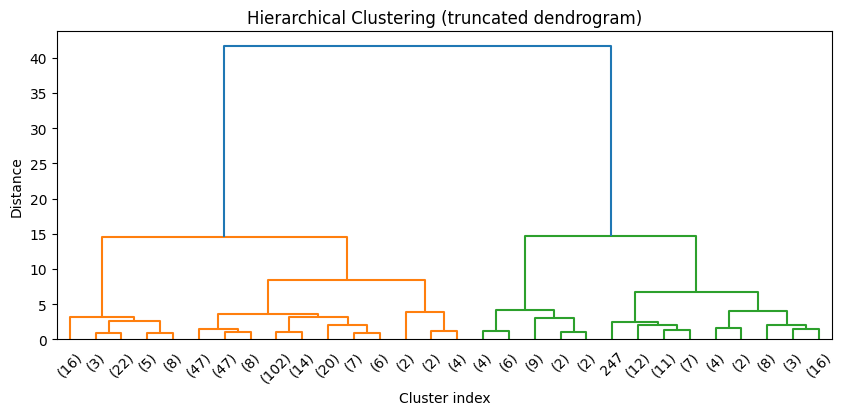

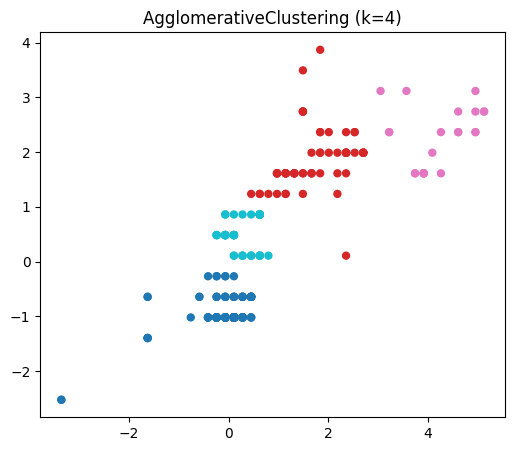

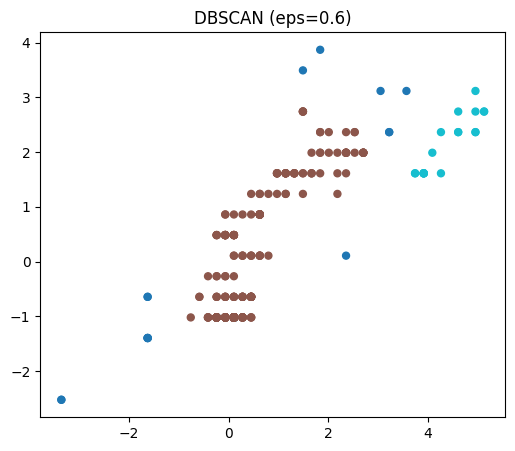

In [7]:
# =============================================================================
# 1. Imports and Setup
# =============================================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering, DBSCAN
from scipy.cluster.hierarchy import linkage, dendrogram
from pathlib import Path

# =============================================================================
# 2. Function Definitions
# =============================================================================
def perform_hierarchical_clustering(X_data, max_display=30):
    Z = linkage(X_data, method="ward")
    plt.figure(figsize=(10, 4))
    dendrogram(Z, truncate_mode="lastp", p=max_display)
    plt.title("Hierarchical Clustering (truncated dendrogram)")
    plt.xlabel("Cluster index"); plt.ylabel("Distance"); plt.show()
    agg = AgglomerativeClustering(n_clusters=4, linkage="ward")
    labels = agg.fit_predict(X_data)
    plt.figure(figsize=(6,5)); plt.scatter(X_data[:,0], X_data[:,1], c=labels, s=25, cmap="tab10")
    plt.title("AgglomerativeClustering (k=4)"); plt.show()

def perform_dbscan_clustering(X_data, eps=0.5, min_samples=5):
    db = DBSCAN(eps=eps, min_samples=min_samples)
    labels = db.fit_predict(X_data)
    plt.figure(figsize=(6,5)); plt.scatter(X_data[:,0], X_data[:,1], c=labels, s=25, cmap="tab10")
    plt.title(f"DBSCAN (eps={eps})"); plt.show()

# =============================================================================
# 3. Main Execution Block
# =============================================================================
if __name__ == "__main__":
    CSV_PATH = "/content/drive/MyDrive/Obfuscated-MalMem2022.csv"
    df = pd.read_csv(CSV_PATH)
    X_df = df.drop(columns=["Class","Category"], errors="ignore")
    numeric_cols = X_df.select_dtypes(include=[np.number]).columns.tolist()
    if len(numeric_cols) < 2:
        raise RuntimeError("Need at least 2 numeric columns for clustering demo.")
    use_cols = numeric_cols[:2]
    print("Using numeric features for clustering demo:", use_cols)
    X2 = X_df[use_cols].copy()
    imputer = SimpleImputer(strategy="median"); X_imp = imputer.fit_transform(X2)
    scaler = StandardScaler(); X_scaled = scaler.fit_transform(X_imp)
    # limit to 400 rows for speed/visualization
    X_sample = X_scaled[:400]
    perform_hierarchical_clustering(X_sample)
    perform_dbscan_clustering(X_sample, eps=0.6, min_samples=5)
